# Introductory applied machine learning (INFR10069)

<div align="right"><font color="blue" size="5">Your Score was 71.0 out of a total of 111.0, or 64.0%</font></div>

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [2]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton
# Your Code goes here:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score,mean_squared_error

C:\Users\User\Miniconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

<div align="right"><font color="blue" size="4">6.0/8.0</font></div>

In [3]:
# (1) # Your Code goes here:
auto_loc = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric=pd.read_csv(auto_loc)
display(auto_numeric.describe())
auto_numeric.info()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 20.0 KB


<div align="right"><font color="blue" size="4">3.0</font></div>

(2) ***Your answer goes here:***
There are 15 attributes(characteristics) for the automobile. The 16th attribute is the target we want to predict, the price.
There are 159 automobiles in the pre-processed dataset, of which all entries are of data type float64.

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

<div align="right"><font color="blue" size="4">13.0/18.0</font></div>

Correlation Coefficients:
normalized-losses  & price:  0.015367647423658213
wheel-base  & price:  0.42351059515038575
length  & price:  0.5128830452653906
width  & price:  0.5243255521274494
height  & price:  0.13956255898680378
engine-size  & price:  0.7151245901914791
bore  & price:  0.3652072892128543
stroke  & price:  0.127834031932651
compression-ratio  & price:  0.12568322167466553
engine-power  & price:  0.44396859146316336
peak-rpm  & price:  -0.09934529106318549
city-mpg  & price:  -0.35678950067247023
highway-mpg  & price:  -0.4384674317144328
mean-effective-pressure  & price:  -0.10486005065048887
torque  & price:  0.1014345813072746


Text(0,0.5,'price')

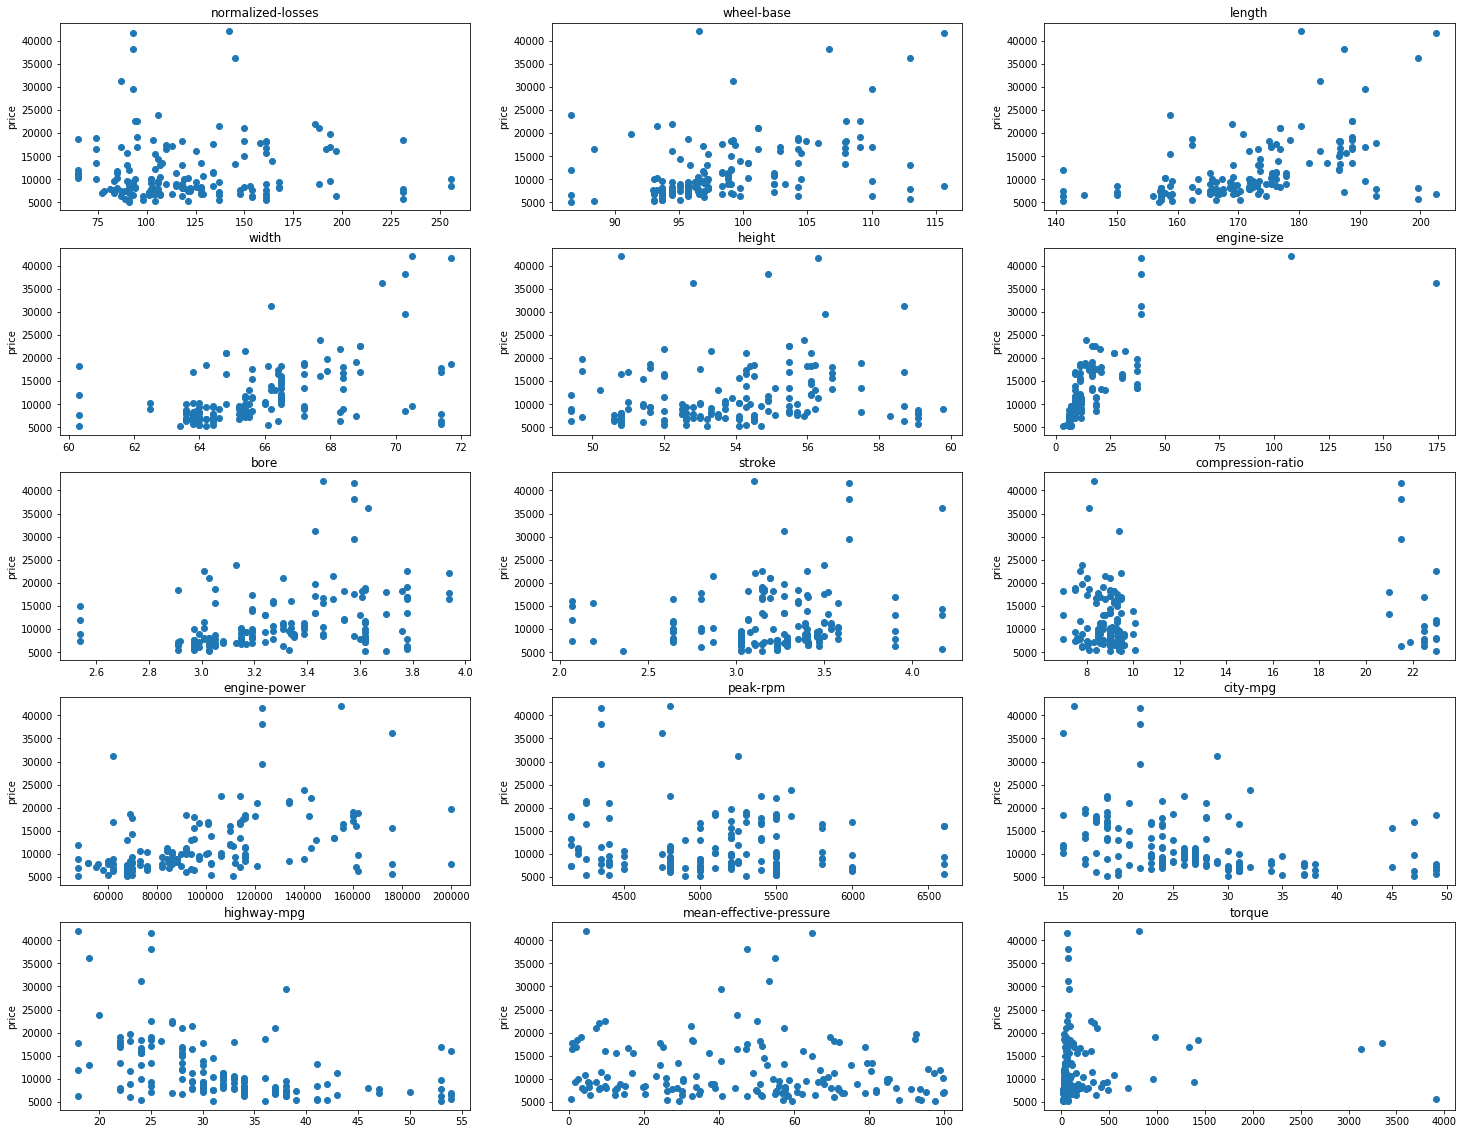

In [5]:
# (1) # Your Code goes here:
#A
print('Correlation Coefficients:')
for col in auto_numeric.columns[:15]:
    print(col , ' & price: ' , np.corrcoef(auto_numeric[col],auto_numeric['price'])[1,0])
#B
fig,axes=plt.subplots(5,3, figsize=(25,20)) #in order to plot all scatter plots in one figure.
axes[0,0].scatter(data=auto_numeric,x='normalized-losses',y='price')
axes[0,0].set_title('normalized-losses')
axes[0,0].set_ylabel('price')
axes[0,1].scatter(data=auto_numeric,x='wheel-base',y='price')
axes[0,1].set_title('wheel-base')
axes[0,1].set_ylabel('price')
axes[0,2].scatter(data=auto_numeric,x='length',y='price')
axes[0,2].set_title('length')
axes[0,2].set_ylabel('price')
axes[1,0].scatter(data=auto_numeric,x='width',y='price')
axes[1,0].set_title('width')
axes[1,0].set_ylabel('price')
axes[1,1].scatter(data=auto_numeric,x='height',y='price')
axes[1,1].set_title('height')
axes[1,1].set_ylabel('price')
axes[1,2].scatter(data=auto_numeric,x='engine-size',y='price')
axes[1,2].set_title('engine-size')
axes[1,2].set_ylabel('price')
axes[2,0].scatter(data=auto_numeric,x='bore',y='price')
axes[2,0].set_title('bore')
axes[2,0].set_ylabel('price')
axes[2,1].scatter(data=auto_numeric,x='stroke',y='price')
axes[2,1].set_title('stroke')
axes[2,1].set_ylabel('price')
axes[2,2].scatter(data=auto_numeric,x='compression-ratio',y='price')
axes[2,2].set_title('compression-ratio')
axes[2,2].set_ylabel('price')
axes[3,0].scatter(data=auto_numeric,x='engine-power',y='price')
axes[3,0].set_title('engine-power')
axes[3,0].set_ylabel('price')
axes[3,1].scatter(data=auto_numeric,x='peak-rpm',y='price')
axes[3,1].set_title('peak-rpm')
axes[3,1].set_ylabel('price')
axes[3,2].scatter(data=auto_numeric,x='city-mpg',y='price')
axes[3,2].set_title('city-mpg')
axes[3,2].set_ylabel('price')
axes[4,0].scatter(data=auto_numeric,x='highway-mpg',y='price')
axes[4,0].set_title('highway-mpg')
axes[4,0].set_ylabel('price')
axes[4,1].scatter(data=auto_numeric,x='mean-effective-pressure',y='price')
axes[4,1].set_title('mean-effective-pressure')
axes[4,1].set_ylabel('price')
axes[4,2].scatter(data=auto_numeric,x='torque',y='price')
axes[4,2].set_title('torque')
axes[4,2].set_ylabel('price')

<div align="right"><font color="blue" size="4">5.0</font></div>

(2) ***Your answer goes here:***
engine-size, length, width, wheel-base, engine-power, highway-mpg. These attributes as seen from the visualisation have a strong density of mutual data points with price in one region and seem to maintain it in the whole value range. Using the correlation coefficient, we can see that those attributes have a higher (absolute) value than others, indicating that they are useful. The correlation coefficient is a quicker tool to identify correlation between attributes.

<div align="right"><font color="blue" size="4">2.0</font></div>

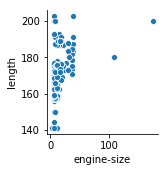

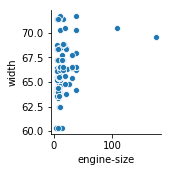

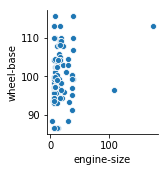

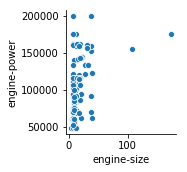

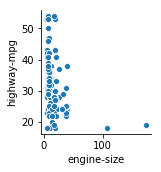

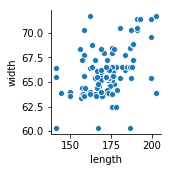

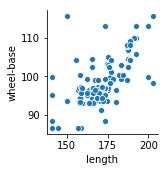

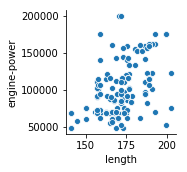

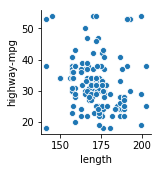

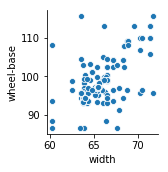

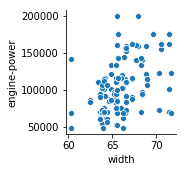

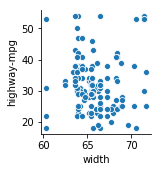

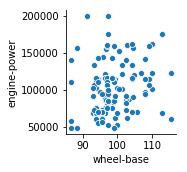

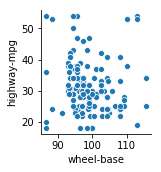

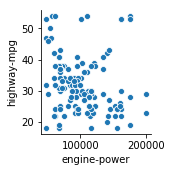

In [6]:
# (3) # Your Code goes here:
sns.pairplot(data=auto_numeric,x_vars='engine-size',y_vars='length')
sns.pairplot(data=auto_numeric,x_vars='engine-size',y_vars='width')
sns.pairplot(data=auto_numeric,x_vars='engine-size',y_vars='wheel-base')
sns.pairplot(data=auto_numeric,x_vars='engine-size',y_vars='engine-power')
sns.pairplot(data=auto_numeric,x_vars='engine-size',y_vars='highway-mpg')
sns.pairplot(data=auto_numeric,x_vars='length',y_vars='width')
sns.pairplot(data=auto_numeric,x_vars='length',y_vars='wheel-base')
sns.pairplot(data=auto_numeric,x_vars='length',y_vars='engine-power')
sns.pairplot(data=auto_numeric,x_vars='length',y_vars='highway-mpg')
sns.pairplot(data=auto_numeric,x_vars='width',y_vars='wheel-base')
sns.pairplot(data=auto_numeric,x_vars='width',y_vars='engine-power')
sns.pairplot(data=auto_numeric,x_vars='width',y_vars='highway-mpg')
sns.pairplot(data=auto_numeric,x_vars='wheel-base',y_vars='engine-power')
sns.pairplot(data=auto_numeric,x_vars='wheel-base',y_vars='highway-mpg')
sns.pairplot(data=auto_numeric,x_vars='engine-power',y_vars='highway-mpg')

<div align="right"><font color="blue" size="4">2.0</font></div>

(4) #STARTHIDE#

[2 Marks] Identify at least 2 pairs which appear correlated. Some examples are: 
  * `length` and `wheel base`
  * `width` and `wheel-base`
  * `engine-power` and `length`
  
  ***Answer***
***Apart from the provided*** pairs (length,wheel-base) , (width,wheel-base), (engine-power,length), ***The pairs (width,engine-power) and (width,length)*** seem to have a stronger correlation between their attribute components than other pairs, which either have a weak or very weak correlation. 

<div align="right"><font color="blue" size="4">2.0</font></div>

(5) ***Your answer goes here:***
normalized-losses,height, torque and mean-effective-pressure are examples of attributes which could be removed to deal with the dimensionality problem. These attributes have an almost-zero correlation with price and in general conceptually they don't seem to have a significant impact as metrics to the no. of accidents and hence the price.

<div align="right"><font color="blue" size="4">2.0</font></div>

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

<div align="right"><font color="blue" size="4">2.0/5.0</font></div>

Text(0,0.5,'Price')

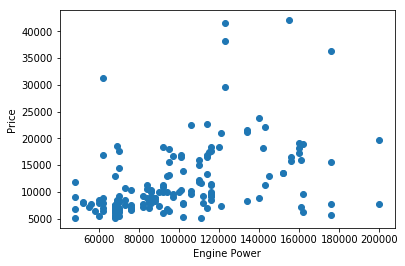

In [7]:
# (1) # Your Code goes here:
plt.scatter(data=auto_numeric,x='engine-power',y='price')
plt.xlabel('Engine Power')
plt.ylabel('Price')

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***
The engine-power variable would make a suitable base to predict a fair approximation of the automobile's price, as it seems to have a strong positive correlation with price.

<div align="right"><font color="blue" size="4">0.0</font></div>

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

<div align="right"><font color="blue" size="4">2.0/8.0</font></div>

C:\Users\User\Miniconda3\envs\py3iaml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Count of Automobiles')

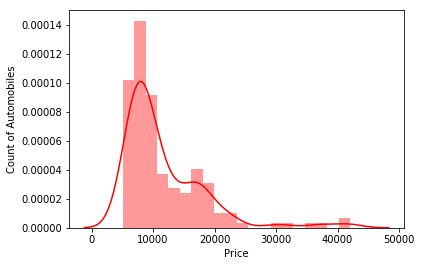

In [9]:
# (1) # Your Code goes here:
sns.distplot(auto_numeric['price'],bins=20,color='r')
plt.xlabel('Price')
plt.ylabel('Count of Automobiles')

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***
It would be difficult to model using linear regression, as the relationships between the price and other variables will not be linear, because of the **non-linear distribution** and the **skewness** of the price variable. We could preprocess the data so that we have linear relationships(correlations) between the price and the rest of variables. It is not conclusive whether these relationships are linear in this case because of the **non-linear and skewed** distribution of the prices, deeming the correlations of the other features(attributes) with the price *unmeaningful*.

<div align="right"><font color="blue" size="4">0.0</font></div>

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

<div align="right"><font color="blue" size="4">3.0/3.0</font></div>

In [12]:
# Your Code goes here:
indep=auto_numeric['engine-power']
indep=np.reshape(indep.values,newshape=(159,1)) #extending the independent variable to two dimensions.
dep=auto_numeric['price']
X_train,X_test,y_train,y_test=train_test_split(indep,dep,train_size=0.8,test_size=0.2,random_state=0)

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

<div align="right"><font color="blue" size="4">0.0/4.0</font></div>

In [11]:
# Your Code goes here:
baseline=auto_numeric['price'].mode()#this calculates the first several modes(most frequent,as seen from the histogram above)
#prices and populates baseline as a column (Series)
print('parameter (mode):  ',baseline[0]) #output the first mode (most frequent) of prices.(should be 1 parameter as stated in question) 

parameter (mode):   5572.0


<div align="right"><font color="blue" size="4">0.0</font></div>

<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

<div align="right"><font color="blue" size="4">3.0/7.0</font></div>

In [13]:
# (1) # Your Code goes here:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print('parameters : \n' , 'coefficient: ', regressor.coef_, '\n' , 'y intercept: ', regressor.intercept_)

parameters : 
 coefficient:  [0.08988389] 
 y intercept:  2823.121891102828


<div align="right"><font color="blue" size="4">3.0</font></div>

(2) ***Your answer goes here:***
The coefficient of the regressor indicates that the gradient of the line is a positive and small value and the line starts from the y-intercept (~2823). As seen from the histogram, most values lie within the range of 2500 to 7500, which the regressor has the chance of approximating using these weights. However, for higher values (e.g. 35000), the small gradient of the line won't allow the regressor to reach or predict a value close to the true value. Because of this low coefficient, we see that engine-power is in the end **not** relevant **enough** to predict the prices by only using it alone.

<div align="right"><font color="blue" size="4">0.0</font></div>

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points. Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

<div align="right"><font color="blue" size="4">5.0/9.0</font></div>

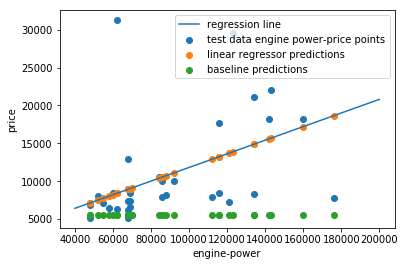

In [14]:
# (1) # Your Code goes here:
plt.scatter(X_test,y_test)
X = np.linspace(40000, 200000, 100,endpoint=True)
plt.plot(X,regressor.coef_*X+regressor.intercept_)
plt.scatter(X_test,regressor.predict(X_test))
plt.xlabel('engine-power')
plt.ylabel('price')
plt.scatter(X_test,np.ones(y_test.shape[0])*(baseline[0]))
plt.legend(['regression line','test data engine power-price points','linear regressor predictions','baseline predictions'])

<div align="right"><font color="blue" size="4">5.0</font></div>

(2) ***Your answer goes here:***
The linear regressor model is on average not as far in distance for each point with the corresponding true test data point than our baseline predictor(mode of true prices used for all points),indicating that the linear regressor model is better than(in the sense that it has less erroneous approximations/predictions) the baseline model.

<div align="right"><font color="blue" size="4">0.0</font></div>

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

<div align="right"><font color="blue" size="4">12.0/20.0</font></div>

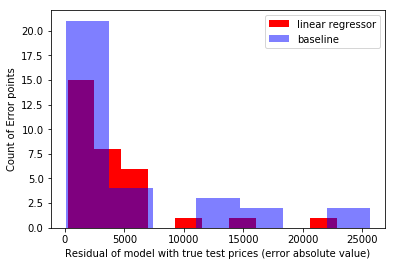

In [15]:
# (1) # Your Code goes here:
plt.hist(np.abs(regressor.predict(X_test)-y_test),bins=10,color='r')
plt.hist(np.abs(np.ones(y_test.shape[0])*(baseline[0])-y_test),bins=7,color='b',alpha=0.5)
plt.xlabel('Residual of model with true test prices (error absolute value)')
plt.ylabel('Count of Error points')
plt.legend(['linear regressor','baseline'])

<div align="right"><font color="blue" size="4">6.0</font></div>

In [16]:
# (2) # Your Code goes here:
regressor_r2=np.round(r2_score(y_true=y_test,y_pred=regressor.predict(X_test)),3)
print('regressor R^2 score:  ', regressor_r2)
regressor_rmse=np.round(np.sqrt(mean_squared_error(y_true=y_test,y_pred=regressor.predict(X_test))),3)
print('regressor Root Mean Squared Error:  ', regressor_rmse)
baseline_r2=np.round(r2_score(y_true=y_test,y_pred=np.ones(y_test.shape[0])*(baseline[0])),3)
print('baseline R^2 score:  ',baseline_r2)
baseline_rmse=np.round(np.sqrt(mean_squared_error(y_true=y_test,y_pred=np.ones(y_test.shape[0])*(baseline[0]))),3)
print('baseline Root Mean Squared Error:  ', baseline_rmse)

regressor R^2 score:   0.169
regressor Root Mean Squared Error:   6153.704
baseline R^2 score:   -0.651
baseline Root Mean Squared Error:   8670.54


<div align="right"><font color="blue" size="4">3.0</font></div>

(3) ***Your answer goes here:***
The $R^2$ score for the linnear regression was positive(although not large-close to 1.0), indicating it(the regression line/model) expresses/models some variability for the data points around their mean. 
On the contrary, the baseline model got a large **negative** result, indicating it is a very bad model, as it express/model the variability of the data points wronly/ on the opposite of what it's supposed to.

The root of the mean squared error(RMSE) indicates the root of the total error of the model's predictions and the true data targets.
The linear regression model had a lower RMSE(6153) than the baseline model(8670), again indicating that our linear regressor is  a better (but mediocre) approximation of the true data targets.

Finally, as we can see from the plot showing the residuals(x-axis, the difference of the predicted and target-true values for each model) and the error count (how many data points got an error of that residual), the only bin(range of values) that the linear regressor did worse(higher error count) than the baseline was the range of 2500 to 7500, which is absolutely sensible considering that the baseline in fact uses that specific range only as its predicted value (parameter).

<div align="right"><font color="blue" size="4">3.0</font></div>

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



<div align="right"><font color="blue" size="4">7.0/9.0</font></div>

(1) ***Your answer goes here:***
Hold-out validation (using just a splitting to train/test data set) is usually very inaccurate as it does not include any training with some training data whatsoever to the regressor before dealing with unknown data. Hence the above results are not accurate and we have to use another method to train the regressor a several amount of times before dealing with a 'new' test data set. Most importantly, the splitting of the data is **random** and does not provide any source of **reliability** for our model if it is generalized. We need to use other methods and more different splittings of the data in order to confirm the reliability of the model.

<div align="right"><font color="blue" size="4">0.0</font></div>

In [17]:
# (2) # Your Code goes here:
kfold=sklearn.model_selection.KFold(n_splits=5,shuffle=True,random_state=0)

<div align="right"><font color="blue" size="4">2.0</font></div>

In [18]:
# (3) # Your Code goes here:
newregressor=LinearRegression()
newregressor.fit(indep,dep)
cross_pred=sklearn.model_selection.cross_val_predict(estimator=newregressor,X=indep,y=dep,cv=kfold)
newregressor_r2=np.round(r2_score(y_true=dep,y_pred=cross_pred),3)
print('new regressor R^2 score:  ', newregressor_r2)
newregressor_rmse=np.round(np.sqrt(mean_squared_error(y_true=dep,y_pred=cross_pred)),3)
print('new regressor Root Mean Squared Error:  ', newregressor_rmse)

new regressor R^2 score:   0.173
new regressor Root Mean Squared Error:   6114.452


<div align="right"><font color="blue" size="4">4.0</font></div>

(4) ***Your answer goes here:*** 
After using cross-validation for our model,using 5 folds to shuffle the train/test samples and train the model repetitively instead of a single time, we observe that the cross-validated model produces a slightly lower RMSE metric(6114 from 6153-lower error is better) and a slightly higher $R^2$ score(0.173 from 0.169-higher is better). 
This now confirms that our original linear regression model had indeed the calculated **general** performance, despite only validating a hold-out test set.

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [ ]:
# (1) # Your Code goes here:

In [ ]:
# (2) Show any working code here...
# Your Code goes here:

(2) - Final Conclusion(s)
***Your answer goes here:***

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

<div align="right"><font color="blue" size="4">6.0/6.0</font></div>

In [19]:
# (1) # Your Code goes here:
multiregressor=LinearRegression()
X=auto_numeric.drop('price',axis=1) #need all features except price as observation data
y=auto_numeric['price'] #need just price as target data ('true labels').
multiregressor.fit(X,y)
cross_pred_multi=sklearn.model_selection.cross_val_predict(estimator=multiregressor,X=X,y=y,cv=kfold)
multiregressor_r2=np.round(r2_score(y_true=y,y_pred=cross_pred_multi),3)
print('multivariate regressor R^2 score:  ', multiregressor_r2)
multiregressor_rmse=np.round(np.sqrt(mean_squared_error(y_true=y,y_pred=cross_pred_multi)),3)
print('multivariate regressor Root Mean Squared Error:  ', multiregressor_rmse)

multivariate regressor R^2 score:   0.486
multivariate regressor Root Mean Squared Error:   4819.805


<div align="right"><font color="blue" size="4">4.0</font></div>

(2) ***Your answer goes here:***
The $R2$ score of the (cross-validated) multivariate model is much higher than that of the (cross-validated) Univariate model (0.486 from 0.173). Likewise, the RMSE is much lower (~4819 from ~6114). Since both metrics are better, this indicates that the Multivariate Regression Model is better in approximating the price, which was anticipated, since this model considers all features as independent variables to calculate the target dependent variable(price).

However, the metrics are **still nowhere near our desired results** for our model (**less** than 0.5/1 for $R2$ and still a **high** RMSE value).

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` again (plot again below)
1. [Text] Why might this cause a problem for linear regression? 

<div align="right"><font color="blue" size="4">4.0/4.0</font></div>

Text(0.5,1,'Engine-size')

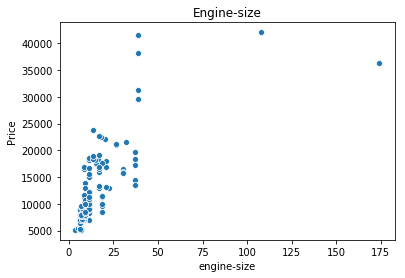

In [20]:
# (1) 
ax = sns.scatterplot(auto_numeric['engine-size'], auto_numeric['price'])
ax.set_ylabel('Price')
ax.set_title('Engine-size')

<div align="right"><font color="blue" size="4">2.0</font></div>

Text(0,0.5,'Price')

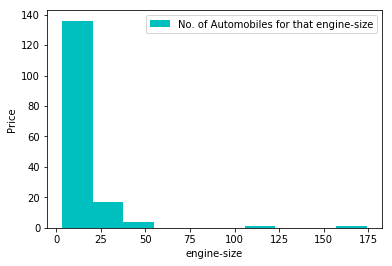

In [21]:
ax2=plt.hist(x=auto_numeric['engine-size'],bins=10,color='c')
plt.legend(['No. of Automobiles for that engine-size'])
plt.xlabel('engine-size')
plt.ylabel('Price')

(2) ***Your answer goes here:***
The data observations (points) of the engine-size feature are not symmetrical, but **left skewed** (very dense in the lower values(0-25) and very narrow in the rest values(>25)). This causes a problem with Linear Regression, since it gives a very big weight to the lower values and very low weight to the rest values. 
The regressor, as a result, will be affected significantly towards those bigger weights when predicting the price,even though it is a multivariate model and considers other features too.

<div align="right"><font color="blue" size="4">2.0</font></div>

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a LinearRegression Model and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

<div align="right"><font color="blue" size="4">8.0/10.0</font></div>

Text(0,0.5,'Price')

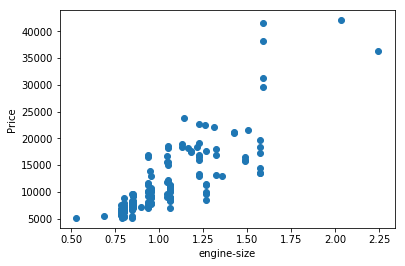

In [22]:
# (1) # Your Code goes here:
engine_size=auto_numeric['engine-size']
engine_size=np.log10(engine_size) #as discussed in class, when we have (only positive, else arctan) data,  
#we can de-skew our data just by applying the logarithm function to all data points (different bases will not affect result).
plt.scatter(engine_size,auto_numeric['price'])
plt.xlabel('engine-size')
plt.ylabel('Price')

<div align="right"><font color="blue" size="4">2.0</font></div>

In [23]:
# (2) # Your Code goes here:
auto_numeric['engine-size']=engine_size #replacing the skewed engine-size with our new log de-skewed engine-size.

finalregressor=LinearRegression()
X=auto_numeric.drop('price',axis=1) #need all features except price as observation data
y=auto_numeric['price'] #need just price as target data ('true labels').
finalregressor.fit(X,y)
cross_pred_final=sklearn.model_selection.cross_val_predict(estimator=finalregressor,X=X,y=y,cv=kfold)
finalregressor_r2=np.round(r2_score(y_true=y,y_pred=cross_pred_final),3)
print('final multivariate regressor R^2 score:  ', finalregressor_r2)
finalregressor_rmse=np.round(np.sqrt(mean_squared_error(y_true=y,y_pred=cross_pred_final)),3)
print('final multivariate regressor Root Mean Squared Error:  ', finalregressor_rmse)

final multivariate regressor R^2 score:   0.69
final multivariate regressor Root Mean Squared Error:   3745.92


<div align="right"><font color="blue" size="4">3.0</font></div>

***Your answer goes here:***
The metrics have improved radically compared to both the multivariate model with the original engine-size and the univariate model.
In particular, the metrics are compared below,
$R2$: Before (skewed engine-size): ~0.486.  After (de-skewed engine-size): ~0.69
RMSE: Before (skewed engine-size): ~4819.  After (de-skewed engine-size): ~3745
The improvement was radical because of replacing the skewed engine-size with the de-skewed (applied log) values. The skewed engine-size and **all skewed independent variables** in general affect linear regression significantly because they are included in the formula for the regression coefficient (commonly known as beta coefficient).
Its formula can be seen here:
\begin{equation}
\hat{\beta}_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2}
\end{equation}
As we can see, the \begin{equation}X-\bar{X}\end{equation} and \begin{equation}X-\bar{X}^2\end{equation} terms are included in summations in both the numerator and denominator of the equation for the coefficient. Hence, a skewness in X(independent variables) will bias the regression's coefficient(gradient), which is the component that drives the approximations/preddictions of the linear regression models.

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

In [ ]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***

In [ ]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***